In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot3d
from IPython.display import display, Latex

# Занятие 18
# Алгебра

## Поверхности второго порядка

Уравнение поверхности второго порядка:
$$
a_{11}x^2+a_{22}y^2+a_{33}z^2+2a_{12}xy+2a_{13}xz+2a_{23}yz+2a_{14}x+2a_{24}y+2a_{34}z+a_{44}
$$
В матричном виде:
$$
X^TAX+2bX+c,\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right),\quad  A=\left(\begin{matrix}a_{11}&a_{12}&a_{13}\\a_{12}&a_{22}&a_{23}\\a_{13}&a_{23}&a_{33}\end{matrix}\right),\quad b=\left(\begin{matrix}a_{14}&a_{24}&a_{34}\end{matrix}\right),\quad c=a_{44}
$$

$$
X^TA_1X,\quad X=\left(\begin{matrix}x\\y\\z\\1\end{matrix}\right), A=\left(\begin{matrix}a_{11}&a_{12}&a_{13}&a_{14}\\a_{12}&a_{22}&a_{23}&a_{24}\\a_{13}&a_{23}&a_{33}&a_{34}\\a_{14}&a_{23}&a_{33}&a_{44}\end{matrix}\right)
$$


### Пример 1.

Записать уравнение поверхности второго порядка $x^2-2y^2-z^2+2xy+4xz+6x-8y+4z-12=0$ в матричном виде двумя способами. Вначале построим матрицу $A$ квадратичной формы, входящей в уравнение, и вектор $b$: 
$$
A=\left(\begin{matrix}1&1&2\\1&-2&0\\2&0&-1\end{matrix}\right),\quad b=\left(\begin{matrix}3&-4&2\end{matrix}\right)
$$
Проверим, что эта матрица задает нашу поверхность второго порядка, для этого вычислим
$$
X^TAX+2bX+c,\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right), \quad c=-12
$$

In [2]:
x, y, z = symbols('x y z')
A = Matrix([[1, 1, 2], [1, -2, 0], [2, 0, -1]])
b = Matrix((3, -4, 2)).T
c = -12
X = Matrix((x, y, z))
display(A, X.T * A * X, b * X)
res = simplify(expand((X.T * A * X)[0] + 2 * (b * X)[0] + c))
display(res)

Matrix([
[1,  1,  2],
[1, -2,  0],
[2,  0, -1]])

Matrix([[x*(x + y + 2*z) + y*(x - 2*y) + z*(2*x - z)]])

Matrix([[3*x - 4*y + 2*z]])

x**2 + 2*x*y + 4*x*z + 6*x - 2*y**2 - 8*y - z**2 + 4*z - 12

Теперь составим расширенную матрицу $A_1$ и проверим, что получилось то же самое уравнение:

In [3]:
A1 = A.row_join(b.T).col_join(b.row_join(Matrix((c, ))))
display(A1)
X1 = X.col_join(Matrix((1, )))
simplify(expand(X1.T * A1 * X1))[0]

Matrix([
[1,  1,  2,   3],
[1, -2,  0,  -4],
[2,  0, -1,   2],
[3, -4,  2, -12]])

x**2 + 2*x*y + 4*x*z + 6*x - 2*y**2 - 8*y - z**2 + 4*z - 12

## Классификация поверхностей второго порядка

Для классификации поверхностей второго порядка нужно привести их уравнение  к каноническому виду, переходя к базису из собственных векторов или выделяя полные квадраты.

15 типов поверхностей второго порядка:

1. Эллипсоид
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1
$$
2. Однополостной гиперболоид 
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=1
$$
3. Двуполостной гиперболоид 
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=-1
$$
4. Конус
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=0
$$
5. Эллиптический параболоид
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=2z
$$
6. Гиперболический параболоид
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=2z
$$
7. Эллиптический цилиндр
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
$$
8. Гиперболический цилиндр
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=1
$$
9. Параболический цилиндр
$$
y^2=2px
$$
10. Пара пересекающихся плоскостей
$$
y^2-k^2x^2=0,quad k\neq0
$$
11. Пара параллельных плоскостей
$$
y^2-k^2=0,quad k\neq0
$$
12. Плоскость
$$
y^2=0
$$
13. Прямая
$$
x^2+y^2=0
$$
14. Одна точка
$$
x^2+y^2+z^2=0
$$
15. Пустое множество
$$
x^2+y^2+z^2=-1,\quad x^2+y^2=-1,\quad x^2=-1
$$

### Пример 2.
Определить тип поверхности второго порядка, заданной уравнением
$$
14x^2−6\sqrt2 xy−6\sqrt2xz+13y^2+2yz+13z^2-4
$$
Составим матрицу 3 порядка, соответствующую нашему уравнению, заметим, что вектор $b$ в нашем случае нулевой. Найдем собственные векторы матрицы и перейдем к базису из собственных векторов.

In [4]:
A = Matrix([[14, -3 * sqrt(2), -3 * sqrt(2)], [-3 * sqrt(2), 13, 1],
            [-3 * sqrt(2), 1, 13]])
X1 = Matrix((x, y, z))

display(A, simplify(expand(X1.T * A * X1))[0])
res = A.eigenvects()
P = res[0][-1][0].row_join(res[1][-1][0]).row_join(res[2][-1][0])
A1 = P.T * A * P
display(A1, simplify(expand(X1.T * A1 * X1))[0])

Matrix([
[        14, -3*sqrt(2), -3*sqrt(2)],
[-3*sqrt(2),         13,          1],
[-3*sqrt(2),          1,         13]])

14*x**2 - 6*sqrt(2)*x*y - 6*sqrt(2)*x*z + 13*y**2 + 2*y*z + 13*z**2

Matrix([
[32,  0,  0],
[ 0, 24,  0],
[ 0,  0, 80]])

32*x**2 + 24*y**2 + 80*z**2

Это эллипсоид, точка или пустое множество.

Для уточнения проделаем такие же действия по переходу в базис из собственных векторов для расширенной матрицы:

In [5]:
b = Matrix((0, 0, 0))
A2 = A.row_join(b).col_join(b.T.row_join(Matrix((-4, ))))
display(A2)
X2 = X1.col_join(Matrix((1, )))
display(simplify(expand(X2.T * A2 * X2))[0])
res = A2.eigenvects()
display(res)

Matrix([
[        14, -3*sqrt(2), -3*sqrt(2),  0],
[-3*sqrt(2),         13,          1,  0],
[-3*sqrt(2),          1,         13,  0],
[         0,          0,          0, -4]])

14*x**2 - 6*sqrt(2)*x*y - 6*sqrt(2)*x*z + 13*y**2 + 2*y*z + 13*z**2 - 4

[(-4, 1, [Matrix([
   [0],
   [0],
   [0],
   [1]])]), (8, 1, [Matrix([
   [sqrt(2)],
   [      1],
   [      1],
   [      0]])]), (12, 1, [Matrix([
   [ 0],
   [-1],
   [ 1],
   [ 0]])]), (20, 1, [Matrix([
   [-sqrt(2)],
   [       1],
   [       1],
   [       0]])])]

In [6]:
P = res[1][-1][0].row_join(res[2][-1][0]).row_join(res[3][-1][0]).row_join(
    res[0][-1][0])
A3 = P.T * A2 * P
u = simplify(expand(X2.T * A3 * X2))[0]
display(A3, u, Eq(u / 4 + 1, 1))

Matrix([
[32,  0,  0,  0],
[ 0, 24,  0,  0],
[ 0,  0, 80,  0],
[ 0,  0,  0, -4]])

32*x**2 + 24*y**2 + 80*z**2 - 4

Eq(8*x**2 + 6*y**2 + 20*z**2, 1)

Получился эллипсоид. Выразим $z$ и изобразим на графике

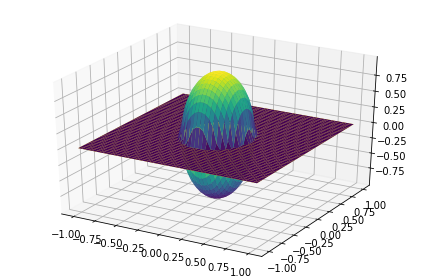

In [7]:
plot3d(-sqrt(1 - 8 * x**2 - 6 * y**2), sqrt(1 - 8 * x**2 - 6 * y**2),
       (x, -1, 1), (y, -1, 1))

### Пример 3.
Определить тип поверхности второго порядка, заданной уравнением
$$
x^2+4y^2-2z^2+2xy+2yz+6xz+6y+2z=0
$$
Проведем замену переменной $X=x+y$, исчезнет слагаемое $xy$

In [8]:
u = x**2 + 4 * y**2 - 2 * z**2 + 2 * x * y + 2 * y * z + 6 * x * z + 6 * y + 2 * z
X, Y, Z = symbols('X,Y,Z')
u = simplify(expand(u.subs(x, X - y)))
u

X**2 + 6*X*z + 3*y**2 - 4*y*z + 6*y - 2*z**2 + 2*z

Проведем замену переменной $Y=y-\frac23 z$, исчезнет слагаемое $yz$

In [9]:
u = simplify(expand(u.subs(y, Y + 2 * z / 3)))
u

X**2 + 6*X*z + 3*Y**2 + 6*Y - 10*z**2/3 + 6*z

Проведем замену переменной $Z=X+3 z$, исчезнет слагаемое $Xz$

In [10]:
u = simplify(expand(u.subs(X, x - 3 * z)))
u

3*Y**2 + 6*Y + x**2 - 37*z**2/3 + 6*z

Проведем замены переменных $y=Y+1$ (исчезнет слагаемое $6y$), $Z=z-\frac{9}{37}$ (исчезнет слагаемое $6z$),

In [11]:
u = simplify(expand(u.subs({Y: y - 1, z: Z + S(9) / 37})))
u

-37*Z**2/3 + x**2 + 3*y**2 - 84/37

Получился однополостной гиперболоид, составим его каноническое уравнение:

In [12]:
u0 = -u.subs({x: 0, y: 0, Z: 0})
Eq(u / u0 + 1, 1)

Eq(-1369*Z**2/252 + 37*x**2/84 + 37*y**2/28, 1)

Выразим $Z$ и изобразим на графике

-sqrt(3)*sqrt(37*x**2 + 111*y**2 - 84)/37

sqrt(3)*sqrt(37*x**2 + 111*y**2 - 84)/37

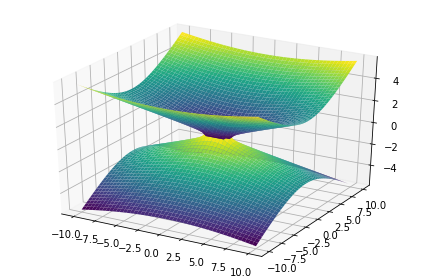

In [13]:
Z1, Z2 = solveset(u, Z)
display(Z1, Z2)
plot3d(Z1, Z2, (x, -10, 10), (y, -10, 10))